In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.datasets import load_gunpoint

In [3]:
# Load all Inputs and Output Data

# 5 mins (1 step ahead)
Deep_train_5   = np.load("Deep_train_5.npz")['x'] 
Output_train_5 = np.load("Deep_train_5.npz")['y']

Deep_test_5   = np.load("Deep_test_5.npz")['x'] 
Output_test_5 = np.load("Deep_test_5.npz")['y'] 

# 15 mins (3 steps ahead)
Deep_train_15   = np.load("Deep_train_15.npz")['x'] 
Output_train_15 = np.load("Deep_train_15.npz")['y']

Deep_test_15   = np.load("Deep_test_15.npz")['x'] 
Output_test_15 = np.load("Deep_test_15.npz")['y']

# 30 mins (6 steps ahead)
Deep_train_30   = np.load("Deep_train_30.npz")['x'] 
Output_train_30 = np.load("Deep_train_30.npz")['y']

Deep_test_30   = np.load("Deep_test_30.npz")['x'] 
Output_test_30 = np.load("Deep_test_30.npz")['y']

# 60 mins (12 steps ahead)
Deep_train_60   = np.load("Deep_train_60.npz")['x'] 
Output_train_60 = np.load("Deep_train_60.npz")['y']

Deep_test_60   = np.load("Deep_test_60.npz")['x'] 
Output_test_60 = np.load("Deep_test_60.npz")['y']

## Input

#### 5 mins

In [4]:
# Train
Xt5 = Deep_train_5
yt5 = Output_train_5
# Test
Xv5 = Deep_test_5
yv5 = Output_test_5

#### 15 mins

In [5]:
# Train
Xt15 = Deep_train_15
yt15 = Output_train_15
# Test
Xv15 = Deep_test_15
yv15 = Output_test_15

#### 30 mins

In [6]:
# Train
Xt30 = Deep_train_30
yt30 = Output_train_30
# Test
Xv30 = Deep_test_30
yv30 = Output_test_30

#### 60 mins

In [7]:
# Train
Xt60 = Deep_train_60
yt60 = Output_train_60
# Test
Xv60 = Deep_test_60
yv60 = Output_test_60

## Check size

In [8]:
Xt5.shape

(49233, 15, 6)

In [9]:
Xt5[1]

array([[0.10162602, 0.07331378, 0.18825911, 0.21682848, 0.18059299,
        0.03098592],
       [0.16666667, 0.13196481, 0.15789474, 0.17799353, 0.13207547,
        0.01126761],
       [0.1300813 , 0.1085044 , 0.11538462, 0.15210356, 0.11859838,
        0.01126761],
       [0.11788618, 0.07331378, 0.11437247, 0.14563107, 0.15633423,
        0.0084507 ],
       [0.13414634, 0.1026393 , 0.08765182, 0.17152104, 0.22371968,
        0.0084507 ],
       [0.11788618, 0.07917889, 0.05040486, 0.17152104, 0.22371968,
        0.0084507 ],
       [0.11382114, 0.07038123, 0.0242915 , 0.11003236, 0.09703504,
        0.0084507 ],
       [0.15447154, 0.12316716, 0.03684211, 0.1407767 , 0.12398922,
        0.0056338 ],
       [0.1097561 , 0.07038123, 0.09716599, 0.18446602, 0.18059299,
        0.0056338 ],
       [0.11788618, 0.08211144, 0.13967611, 0.19093851, 0.17250674,
        0.01690141],
       [0.10162602, 0.07624633, 0.0708502 , 0.1618123 , 0.17250674,
        0.0028169 ],
       [0.10162602, 0

## Transformations

In [10]:
n_features = 6
n_GAF = 15

# Summation
gasf = GramianAngularField(image_size=1., method='summation', sample_range=None)
# Difference
gadf = GramianAngularField(image_size=1., method='difference', sample_range=None)

In [11]:
train_sum_samples5 = np.empty((len(Xt5), n_features, n_GAF, n_GAF))

train_dif_samples5 = np.empty((len(Xt5), n_features, n_GAF, n_GAF))

In [12]:
train_sum_samples5.shape

(49233, 6, 15, 15)

In [13]:
for i in range(len(Xt5)):
    try:
        # Transpose data first because:
        # expected shape is (n_samples, n_timestamps)
        X = np.transpose(Xt5[i])

        # Perform the GAF transformations
        X_gasf = gasf.transform(X)
        X_gadf = gadf.transform(X)

        # Store value in the array to get the shape:
        # (samples, feature, n_GAF, n_GAF)
        train_sum_samples5[i,:,:,:] = X_gasf
        train_dif_samples5[i,:,:,:] = X_gadf
    except:
        print(i)

13152
13153
13154
13155
13156
13157
13158
13159
13160
13161
13162
13163
13164
13165
13166


In [14]:
Xt5[13164].max()

1.0000000000000002

In [15]:
train_sum_samples5[0].shape

(6, 15, 15)

In [16]:
train_sum_samples5[0][0].shape

(15, 15)

## Plots

In [17]:
plt.rcParams.update({'font.size': 16})

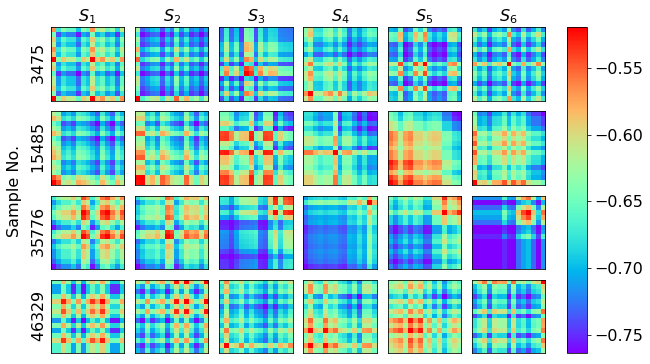

In [18]:
# Show the images for a random window slice
fig = plt.figure(figsize=(10.5, 6))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(4, 6),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
# images = [train_sum_samples5[140][3], train_dif_samples5[140][3]]
# titles = ['Summation', 'Difference']
images = [train_sum_samples5[3475][0], train_sum_samples5[3475][1], train_sum_samples5[3475][2], train_sum_samples5[3475][3], 
          train_sum_samples5[3475][4], train_sum_samples5[3475][5],
          train_sum_samples5[15485][0], train_sum_samples5[15485][1], train_sum_samples5[15485][2], train_sum_samples5[15485][3], 
          train_sum_samples5[15485][4], train_sum_samples5[15485][5],
          train_sum_samples5[35776][0], train_sum_samples5[35776][1], train_sum_samples5[35776][2], train_sum_samples5[35776][3], 
          train_sum_samples5[35776][4], train_sum_samples5[35776][5],
          train_sum_samples5[46329][0], train_sum_samples5[46329][1], train_sum_samples5[46329][2], train_sum_samples5[46329][3], 
          train_sum_samples5[46329][4], train_sum_samples5[46329][5]
         ]
titles = ['$S_1$', '$S_2$', '$S_3$', '$S_4$', '$S_5$', '$S_6$', 
          '', '', '', '', '', '', 
          '', '', '', '', '', '', 
          '', '', '', '', '', '']
indexes = [i for i in range(24)]

for image, title, ax, index in zip(images, titles, grid, indexes):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 16})
    if index/6 == 0:
        ax.set_ylabel('$3475$')
    elif index/6 == 1:
        ax.set_ylabel('$15485$')
    elif index/6 == 2:
        ax.set_ylabel('$35776$')
    else:
        ax.set_ylabel('$46329$')

grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
fig.text(0.1, 0.5, 'Sample No.', va='center', rotation='vertical')
ax.cax.colorbar(im)
ax.cax.toggle_label(True)


#plt.suptitle('Gramian Angular Summation Fields (GASF)', y=0.98, fontsize=16)
plt.show()

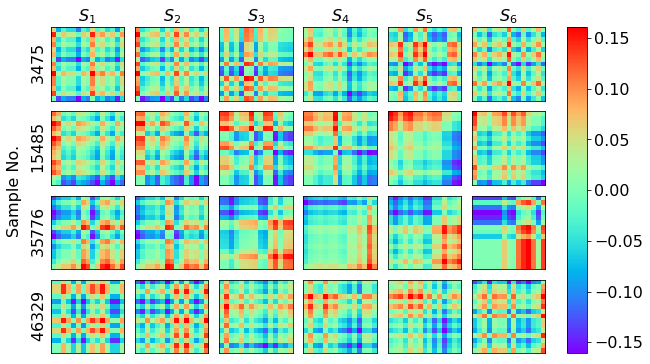

In [19]:
# Show the images for a random window slice
fig = plt.figure(figsize=(10.5, 6))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(4, 6),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.3,
                 )
# images = [train_sum_samples5[140][3], train_dif_samples5[140][3]]
# titles = ['Summation', 'Difference']
images = [train_dif_samples5[3475][0], train_dif_samples5[3475][1], train_dif_samples5[3475][2], train_dif_samples5[3475][3], 
          train_dif_samples5[3475][4], train_dif_samples5[3475][5], 
          train_dif_samples5[15485][0], train_dif_samples5[15485][1], train_dif_samples5[15485][2], train_dif_samples5[15485][3], 
          train_dif_samples5[15485][4], train_dif_samples5[15485][5], 
          train_dif_samples5[35776][0], train_dif_samples5[35776][1], train_dif_samples5[35776][2], train_dif_samples5[35776][3], 
          train_dif_samples5[35776][4], train_dif_samples5[35776][5],  
          train_dif_samples5[46329][0], train_dif_samples5[46329][1], train_dif_samples5[46329][2], train_dif_samples5[46329][3], 
          train_dif_samples5[46329][4], train_dif_samples5[46329][5], 
         ]
titles = ['$S_1$', '$S_2$', '$S_3$', '$S_4$', '$S_5$', '$S_6$', 
          '', '', '', '', '', '', 
          '', '', '', '', '', '',
          '', '', '', '', '', '']
indexes = [i for i in range(24)]

for image, title, ax, index in zip(images, titles, grid, indexes):
    im = ax.imshow(image, cmap='rainbow', origin='lower')
    ax.set_title(title, fontdict={'fontsize': 16})
    if index/6 == 0:
        ax.set_ylabel('$3475$')
    elif index/6 == 1:
        ax.set_ylabel('$15485$')
    elif index/6 == 2:
        ax.set_ylabel('$35776$')
    else:
        ax.set_ylabel('$46329$')

grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
fig.text(0.1, 0.5, 'Sample No.', va='center', rotation='vertical')
ax.cax.colorbar(im)
ax.cax.toggle_label(True)


#plt.suptitle('Gramian Angular Difference Fields (GADF)', y=0.98, fontsize=16)
plt.show()